In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import sklearn as skl

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
df.sample(10)

,Unnamed: 0,campaign_a_touchpoints,campaign_b_touchpoints,campaign_c_touchpoints,total_touchpoints,num_web_visits,purchase_flag,vehicle_class,finance_customer,service_plan_customer,trade_in_customer,state,unaided_awareness
94690,94690,0,0,0,0,86,False,NaN,0,0,False,KY,0.114511
76221,76221,0,0,0,0,21,True,COMPACT,0,0,True,DE,0.143720
23989,23989,0,0,0,0,14,True,MID SIZE,1,0,False,AZ,0.122562
27246,27246,0,0,0,0,13,False,NaN,0,0,False,CA,0.232951
94968,94968,0,13,0,13,14,False,NaN,0,0,False,KY,0.206885
41531,41531,0,0,0,0,45,False,NaN,0,0,False,WA,0.144525
86963,86963,0,0,0,0,7,False,NaN,0,0,True,MD,0.128314
52268,52268,0,2,0,2,25,False,NaN,0,0,True,VA,0.366472
62080,62080,0,0,2,2,32,True,PICKUP,1,1,False,PA,0.214259
3863,3863,0,0,0,0,28,True,SMALL SUV,1,0,False,DE,0.143720


In [ ]:
df = df.drop("Unnamed: 0", axis=1)

In [ ]:
print("Successful:")
print(successful_campaign_a)
print(successful_campaign_b)
print(successful_campaign_c)

print("\nUnsuccessful:")
print(unsuccessful_campaign_a)
print(unsuccessful_campaign_b)
print(unsuccessful_campaign_c)

Successful:
6937
62163
9006

Unsuccessful:
11628
102243
8938


In [ ]:
# Linear Regression Analysis
"""
The goal of regression analysis is to find correlations among the variables in the dataset
"""

Conclusion: "vehicle_class" and "state" are adding unneccessary noise and are not independent variables that are neccessary for this regression. Any model finding purchasing relationships should avoid string variables for clarity. We can explore those relationships later; for now we leave them out.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_curve, auc, precision_recall_curve

# Load the dataset
file_path = '/content/drive/Shareddrives/CarMax/Fall 2024 Dataset.csv'
data = pd.read_csv(file_path)

# Step 1: Data Preparation

# Fill missing 'vehicle_class' based on 'purchase_flag'
data['vehicle_class'].fillna('No Purchase', inplace=True)

# Ensure 'finance_customer' and 'service_plan' are set properly based on 'purchase_flag'
data.loc[data['purchase_flag'] == 0, ['finance_customer', 'service_plan_customer']] = 0

# Create 'total_touchpoints' if it does not exist
data['total_touchpoints'] = data['campaign_a_touchpoints'] + data['campaign_b_touchpoints'] + data['campaign_c_touchpoints']

# One-hot encode 'vehicle_class' and 'state'
data = pd.get_dummies(data, columns=['vehicle_class', 'state'], drop_first=True)


<ipython-input-25-2c53ddee0f74>:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['vehicle_class'].fillna('No Purchase', inplace=True)


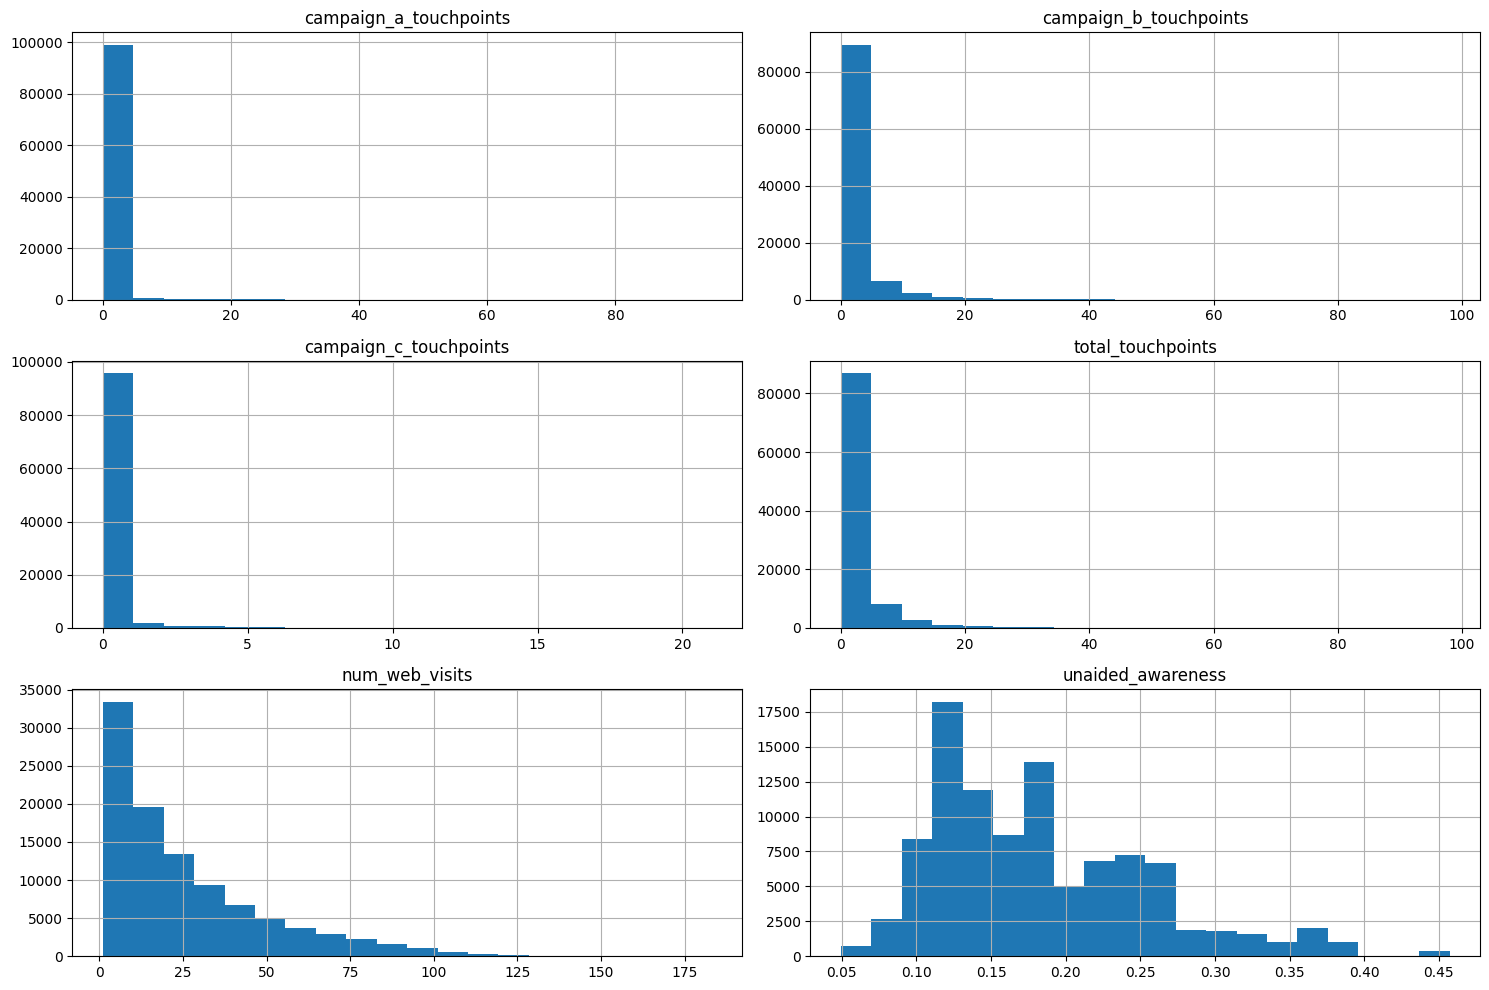

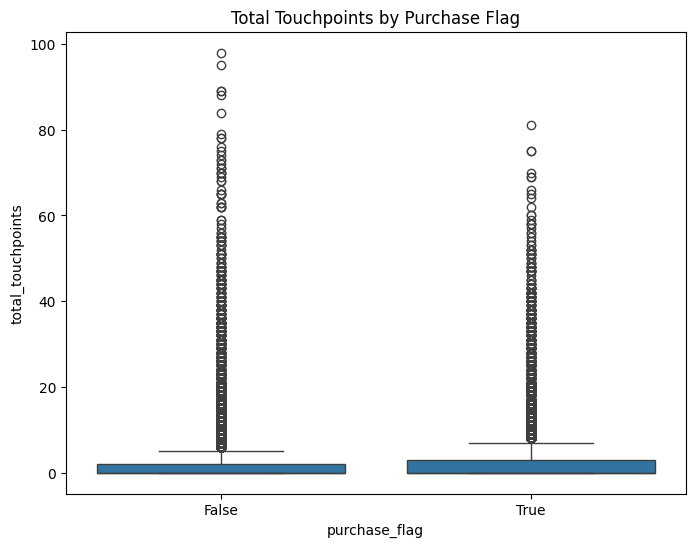

KeyError: 'vehicle_class_No Purchase'

<Figure size 1200x600 with 0 Axes>

In [ ]:
# Step 2: Exploratory Data Analysis (EDA)

# Histograms for numeric variables
numeric_vars = ['campaign_a_touchpoints', 'campaign_b_touchpoints', 'campaign_c_touchpoints',
                'total_touchpoints', 'num_web_visits', 'unaided_awareness']
data[numeric_vars].hist(bins=20, figsize=(15, 10))
plt.tight_layout()
plt.show()

# Box plots of 'total_touchpoints' by 'purchase_flag'
plt.figure(figsize=(8, 6))
sns.boxplot(x='purchase_flag', y='total_touchpoints', data=data)
plt.title('Total Touchpoints by Purchase Flag')
plt.show()

# Bar plot for vehicle class distribution by purchase flag
plt.figure(figsize=(12, 6))
vehicle_counts = data.groupby(['vehicle_class_No Purchase', 'purchase_flag']).size().unstack()
vehicle_counts.plot(kind='bar', stacked=True)
plt.title('Vehicle Class Distribution by Purchase Flag')
plt.ylabel('Count')
plt.show()

# Correlation Heatmap
plt.figure(figsize=(10, 8))
correlation_features = numeric_vars + ['purchase_flag', 'trade_in_customer']
sns.heatmap(data[correlation_features].corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()


1.) What is the success rate of each of the marketing campaigns? What campaigns have the largest predictors on revenue-driving KPIs (these are "purchase_flag" and "trade_in_customers", as these are the two main transactions)

2.) How does the unaided awareness index increase or decrease likelihood of touchpoint conversion into revenue-driving KPIs of "purchase_flag" and "trade_in_customers"?

<ipython-input-10-323c56ec64ac>:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['vehicle_class'].fillna('No Purchase', inplace=True)


Purchase Conversion Rates by Campaign: {'campaign_a': 0.33704453441295545, 'campaign_b': 0.34700817907877746, 'campaign_c': 0.44959733407386837}
Trade-In Conversion Rates by Campaign: {'campaign_a': 0.21002024291497975, 'campaign_b': 0.21041756349548, 'campaign_c': 0.20938628158844766}

Logistic Regression Purchase Flag Report:
               precision    recall  f1-score   support

       False       0.71      0.99      0.82     27965
        True       0.53      0.04      0.07     11963

    accuracy                           0.70     39928
   macro avg       0.62      0.51      0.45     39928
weighted avg       0.65      0.70      0.60     39928



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Logistic Regression Trade-In Customer Report:
               precision    recall  f1-score   support

       False       0.79      1.00      0.88     31449
        True       0.00      0.00      0.00      8479

    accuracy                           0.79     39928
   macro avg       0.39      0.50      0.44     39928
weighted avg       0.62      0.79      0.69     39928



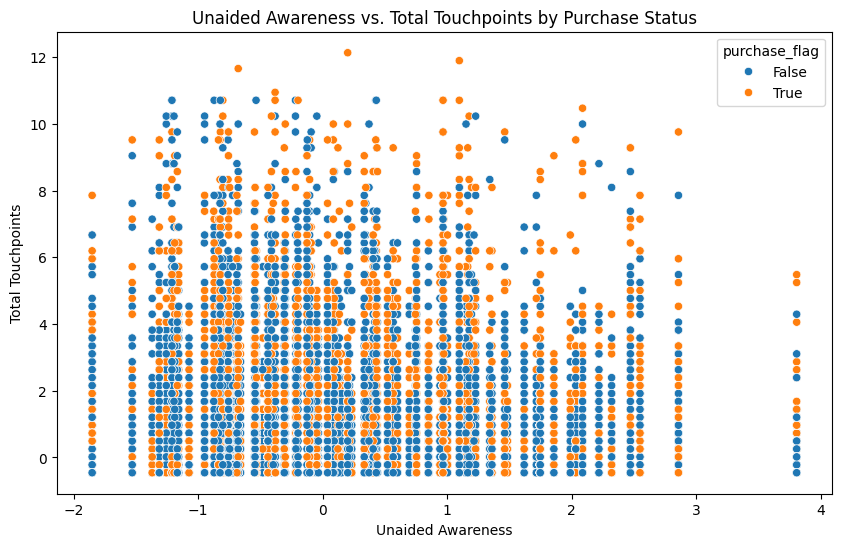

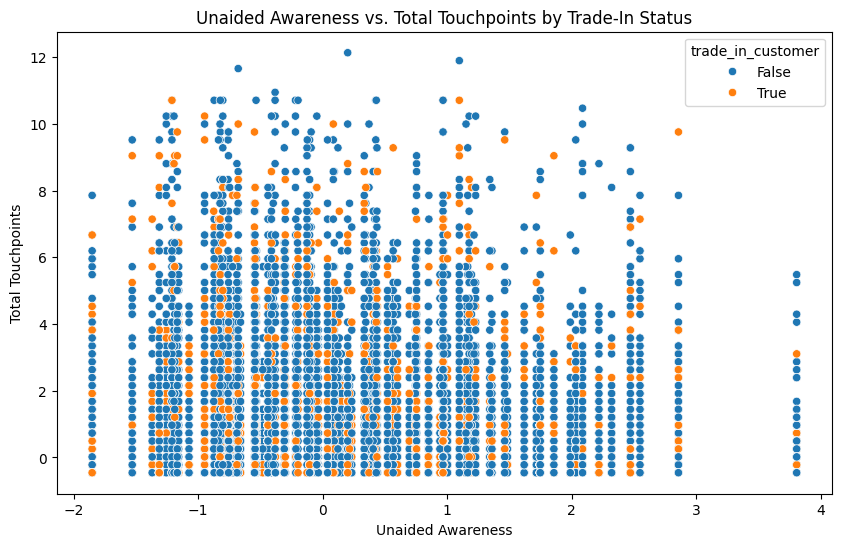

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, roc_curve, auc

# Load the dataset
file_path = '/content/drive/Shareddrives/CarMax/Fall 2024 Dataset.csv'
data = pd.read_csv(file_path)

# Step 1: Data Preparation

# Fill missing 'vehicle_class' based on 'purchase_flag' but exclude it from regression analysis
data['vehicle_class'].fillna('No Purchase', inplace=True)

# Define 'finance_customer' and 'service_plan' properly
data.loc[data['purchase_flag'] == 0, ['finance_customer', 'service_plan_customer']] = 0

# Create 'total_touchpoints' if not already present
data['total_touchpoints'] = data['campaign_a_touchpoints'] + data['campaign_b_touchpoints'] + data['campaign_c_touchpoints']

# Exclude 'vehicle_class' and 'state' from the regression features
features = [
    'campaign_a_touchpoints', 'campaign_b_touchpoints', 'campaign_c_touchpoints',
    'total_touchpoints', 'num_web_visits', 'unaided_awareness'
]

# Step 2: Filter out touchpoints that appear fewer than 10 times

# Campaign A
touchpoint_counts_a = data['campaign_a_touchpoints'].value_counts()
valid_touchpoints_a = touchpoint_counts_a[touchpoint_counts_a >= 10].index
data = data[data['campaign_a_touchpoints'].isin(valid_touchpoints_a)]

# Campaign B
touchpoint_counts_b = data['campaign_b_touchpoints'].value_counts()
valid_touchpoints_b = touchpoint_counts_b[touchpoint_counts_b >= 10].index
data = data[data['campaign_b_touchpoints'].isin(valid_touchpoints_b)]

# Campaign C
touchpoint_counts_c = data['campaign_c_touchpoints'].value_counts()
valid_touchpoints_c = touchpoint_counts_c[touchpoint_counts_c >= 10].index
data = data[data['campaign_c_touchpoints'].isin(valid_touchpoints_c)]

# Step 3: Normalize Numeric Variables
scaler = StandardScaler()
data[features] = scaler.fit_transform(data[features])

# Step 4: Success Rates of Marketing Campaigns

# Calculate the conversion rate of each campaign into "purchase_flag"
purchase_conversion = {
    'campaign_a': data[data['campaign_a_touchpoints'] > 0]['purchase_flag'].mean(),
    'campaign_b': data[data['campaign_b_touchpoints'] > 0]['purchase_flag'].mean(),
    'campaign_c': data[data['campaign_c_touchpoints'] > 0]['purchase_flag'].mean()
}

# Calculate the conversion rate of each campaign into "trade_in_customer"
trade_in_conversion = {
    'campaign_a': data[data['campaign_a_touchpoints'] > 0]['trade_in_customer'].mean(),
    'campaign_b': data[data['campaign_b_touchpoints'] > 0]['trade_in_customer'].mean(),
    'campaign_c': data[data['campaign_c_touchpoints'] > 0]['trade_in_customer'].mean()
}

# Display conversion rates
print("Purchase Conversion Rates by Campaign:", purchase_conversion)
print("Trade-In Conversion Rates by Campaign:", trade_in_conversion)

# Step 5: Regression Analysis for "purchase_flag"
X_purchase = data[features]
y_purchase = data['purchase_flag']

# Train-test split
X_train_purchase, X_valid_purchase, y_train_purchase, y_valid_purchase = train_test_split(
    X_purchase, y_purchase, test_size=0.4, random_state=42
)

# Logistic Regression for purchase prediction
log_reg_purchase = LogisticRegression(max_iter=1000)
log_reg_purchase.fit(X_train_purchase, y_train_purchase)
y_pred_purchase = log_reg_purchase.predict(X_valid_purchase)
print("\nLogistic Regression Purchase Flag Report:\n", classification_report(y_valid_purchase, y_pred_purchase))

# Step 6: Regression Analysis for "trade_in_customer"
X_trade_in = data[features]
y_trade_in = data['trade_in_customer']

# Train-test split
X_train_trade_in, X_valid_trade_in, y_train_trade_in, y_valid_trade_in = train_test_split(
    X_trade_in, y_trade_in, test_size=0.4, random_state=42
)

# Logistic Regression for trade-in prediction
log_reg_trade_in = LogisticRegression(max_iter=1000)
log_reg_trade_in.fit(X_train_trade_in, y_train_trade_in)
y_pred_trade_in = log_reg_trade_in.predict(X_valid_trade_in)
print("\nLogistic Regression Trade-In Customer Report:\n", classification_report(y_valid_trade_in, y_pred_trade_in))

# Step 7: Visualize the Impact of Unaided Awareness

# Scatter plot of unaided awareness vs total touchpoints with purchase flag
plt.figure(figsize=(10, 6))
sns.scatterplot(x='unaided_awareness', y='total_touchpoints', hue='purchase_flag', data=data)
plt.title('Unaided Awareness vs. Total Touchpoints by Purchase Status')
plt.xlabel('Unaided Awareness')
plt.ylabel('Total Touchpoints')
plt.show()

# Scatter plot of unaided awareness vs total touchpoints with trade-in customer
plt.figure(figsize=(10, 6))
sns.scatterplot(x='unaided_awareness', y='total_touchpoints', hue='trade_in_customer', data=data)
plt.title('Unaided Awareness vs. Total Touchpoints by Trade-In Status')
plt.xlabel('Unaided Awareness')
plt.ylabel('Total Touchpoints')
plt.show()


*   The higher the unaided awareness, the less touchpoints needed to receive a larger quantity of conversions.
*   More total touchpoints =/= more purchases
*   Data still feels too large to gather significant insight
*   Use this to inspire narrower findings





***Correlation between total campaign touchpoints and purchase flag***

Correlations between Campaigns and Purchase Flag:
   Campaign  Correlation with Purchase Flag
0        A                        0.018162
1        B                        0.064698
2        C                        0.095075


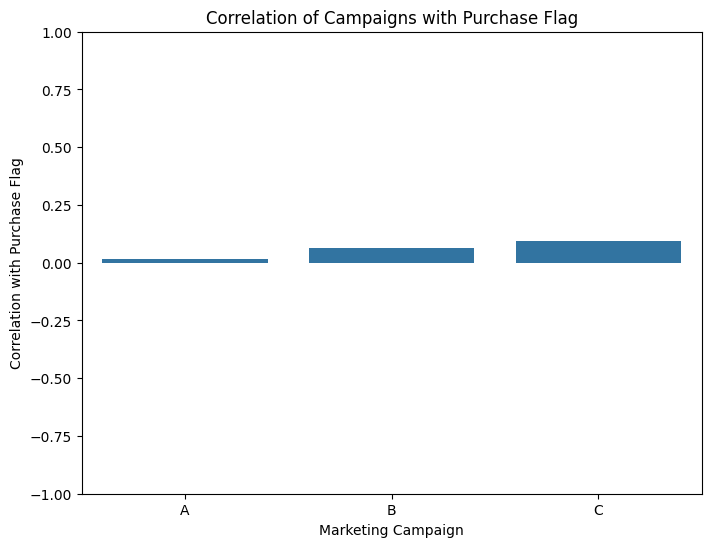

In [ ]:
# Calculate correlation between campaign touchpoints and purchase_flag
correlation_a = data['campaign_a_touchpoints'].corr(data['purchase_flag'])
correlation_b = data['campaign_b_touchpoints'].corr(data['purchase_flag'])
correlation_c = data['campaign_c_touchpoints'].corr(data['purchase_flag'])

# Create a DataFrame to display the correlations
correlations_df = pd.DataFrame({
    'Campaign': ['A', 'B', 'C'],
    'Correlation with Purchase Flag': [correlation_a, correlation_b, correlation_c]
})

print("Correlations between Campaigns and Purchase Flag:\n", correlations_df)

# Visualize the correlation using a bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x='Campaign', y='Correlation with Purchase Flag', data=correlations_df)
plt.title('Correlation of Campaigns with Purchase Flag')
plt.ylim(-1, 1)  # Correlation ranges between -1 and 1
plt.xlabel('Marketing Campaign')
plt.ylabel('Correlation with Purchase Flag')
plt.show()

Correlation of Campaigns with Purchase Flag analysis: C seems to have the highest level of correlation with purchasing, although all campaigns seem to have a low level of correlation. This could be due to the pure volume of touchpoints and the low cost nature of generating these touchpoints. To narrow this data, we should refine our search for correlation to find the "sweet spot" for each campaign in terms of conversions.

***Calculate the purchase rate for each number of touchpoints***

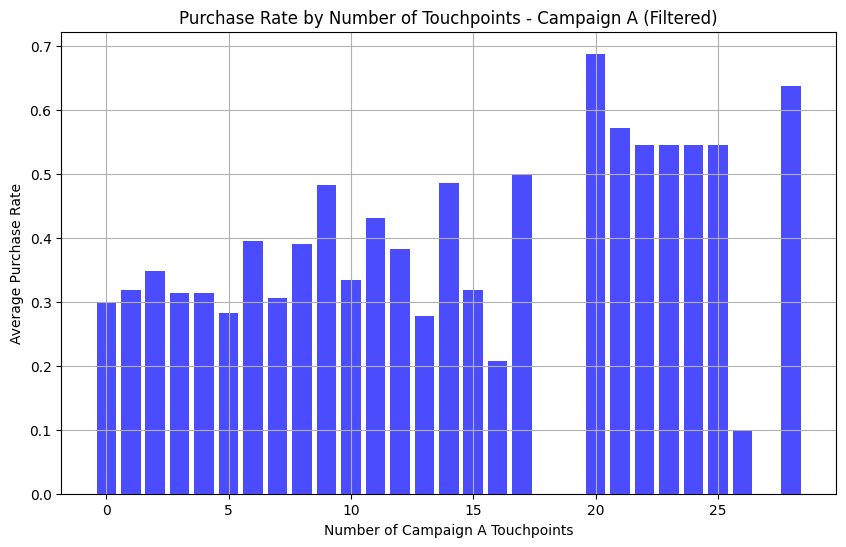

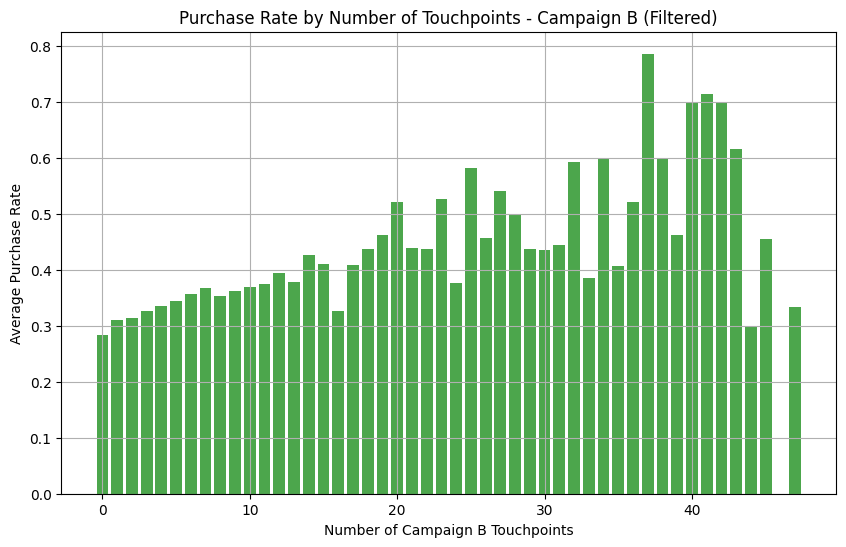

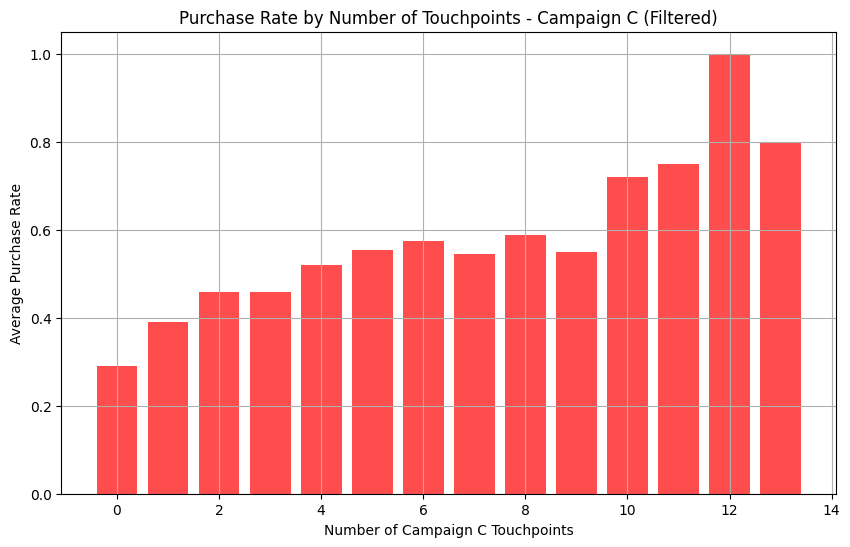

Highest purchase rate for Campaign A is at 20.0 touchpoints: 68.75%
Highest purchase rate for Campaign B is at 37.0 touchpoints: 78.57%
Highest purchase rate for Campaign C is at 12.0 touchpoints: 100.00%


In [ ]:
# Step 1: Filter out touchpoints that appear fewer than 10 times

# Campaign A
touchpoint_counts_a = data['campaign_a_touchpoints'].value_counts()
valid_touchpoints_a = touchpoint_counts_a[touchpoint_counts_a >= 10].index
filtered_data_a = data[data['campaign_a_touchpoints'].isin(valid_touchpoints_a)]

# Campaign B
touchpoint_counts_b = data['campaign_b_touchpoints'].value_counts()
valid_touchpoints_b = touchpoint_counts_b[touchpoint_counts_b >= 10].index
filtered_data_b = data[data['campaign_b_touchpoints'].isin(valid_touchpoints_b)]

# Campaign C
touchpoint_counts_c = data['campaign_c_touchpoints'].value_counts()
valid_touchpoints_c = touchpoint_counts_c[touchpoint_counts_c >= 10].index
filtered_data_c = data[data['campaign_c_touchpoints'].isin(valid_touchpoints_c)]

# Step 2: Calculate the purchase rate for each number of touchpoints

# For Campaign A
purchase_rate_a = filtered_data_a.groupby('campaign_a_touchpoints')['purchase_flag'].mean().reset_index(name='purchase_rate')

# For Campaign B
purchase_rate_b = filtered_data_b.groupby('campaign_b_touchpoints')['purchase_flag'].mean().reset_index(name='purchase_rate')

# For Campaign C
purchase_rate_c = filtered_data_c.groupby('campaign_c_touchpoints')['purchase_flag'].mean().reset_index(name='purchase_rate')

# Step 3: Visualize the relationship

# Plot for Campaign A
plt.figure(figsize=(10, 6))
plt.bar(purchase_rate_a['campaign_a_touchpoints'], purchase_rate_a['purchase_rate'], color='blue', alpha=0.7)
plt.title('Purchase Rate by Number of Touchpoints - Campaign A (Filtered)')
plt.xlabel('Number of Campaign A Touchpoints')
plt.ylabel('Average Purchase Rate')
plt.grid(True)
plt.show()

# Plot for Campaign B
plt.figure(figsize=(10, 6))
plt.bar(purchase_rate_b['campaign_b_touchpoints'], purchase_rate_b['purchase_rate'], color='green', alpha=0.7)
plt.title('Purchase Rate by Number of Touchpoints - Campaign B (Filtered)')
plt.xlabel('Number of Campaign B Touchpoints')
plt.ylabel('Average Purchase Rate')
plt.grid(True)
plt.show()

# Plot for Campaign C
plt.figure(figsize=(10, 6))
plt.bar(purchase_rate_c['campaign_c_touchpoints'], purchase_rate_c['purchase_rate'], color='red', alpha=0.7)
plt.title('Purchase Rate by Number of Touchpoints - Campaign C (Filtered)')
plt.xlabel('Number of Campaign C Touchpoints')
plt.ylabel('Average Purchase Rate')
plt.grid(True)
plt.show()

# Step 4: Identify the touchpoint number with the highest purchase rate
max_rate_a = purchase_rate_a.loc[purchase_rate_a['purchase_rate'].idxmax()]
max_rate_b = purchase_rate_b.loc[purchase_rate_b['purchase_rate'].idxmax()]
max_rate_c = purchase_rate_c.loc[purchase_rate_c['purchase_rate'].idxmax()]

print(f"Highest purchase rate for Campaign A is at {max_rate_a['campaign_a_touchpoints']} touchpoints: {max_rate_a['purchase_rate']:.2%}")
print(f"Highest purchase rate for Campaign B is at {max_rate_b['campaign_b_touchpoints']} touchpoints: {max_rate_b['purchase_rate']:.2%}")
print(f"Highest purchase rate for Campaign C is at {max_rate_c['campaign_c_touchpoints']} touchpoints: {max_rate_c['purchase_rate']:.2%}")

*   Highest purchase rates are as follows (for those touchpoint values that have 10 or more instances in the dataset): A ~ 12 touchpoints @ 68.75 B ~ 8 touchpoints B ~ 8 @ 78.57% C ~ 14 @ 100.00%  
*   These graphs paint a much stronger picture of the relationship between the marketing campaigns and the purchase rate
*   To eliminate noise and outliers, step 1 in this code allows for the trimming of the data to only include those values that have minimum 10 instances for their touchpoint values (no 98 touchpoint values here)
*   This data is CRUCIAL for predicting customer purchase habits using # of touchpoints from each campaign (MARKETING STRATEGY)





****Linear Regression - Correlation between Campaign Touchpoints and Purchase****

<ipython-input-11-a154a19f4a8c>:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['vehicle_class'].fillna('No Purchase', inplace=True)


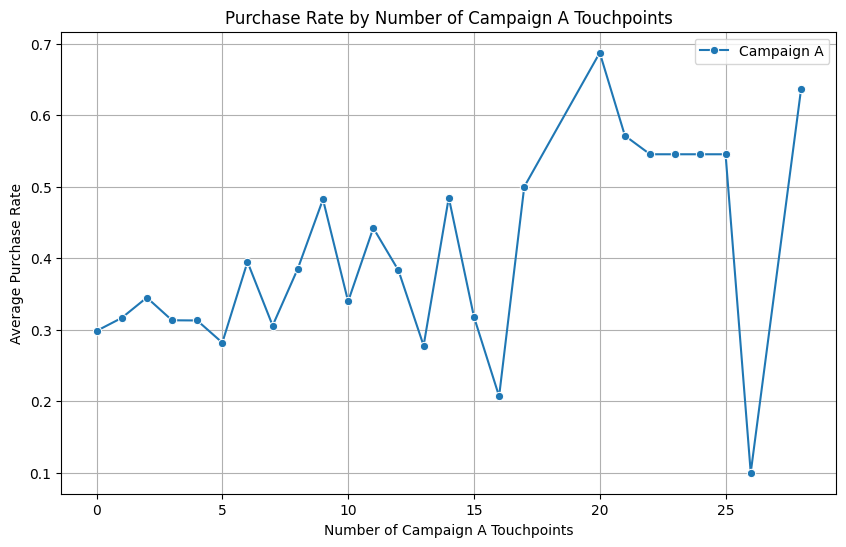

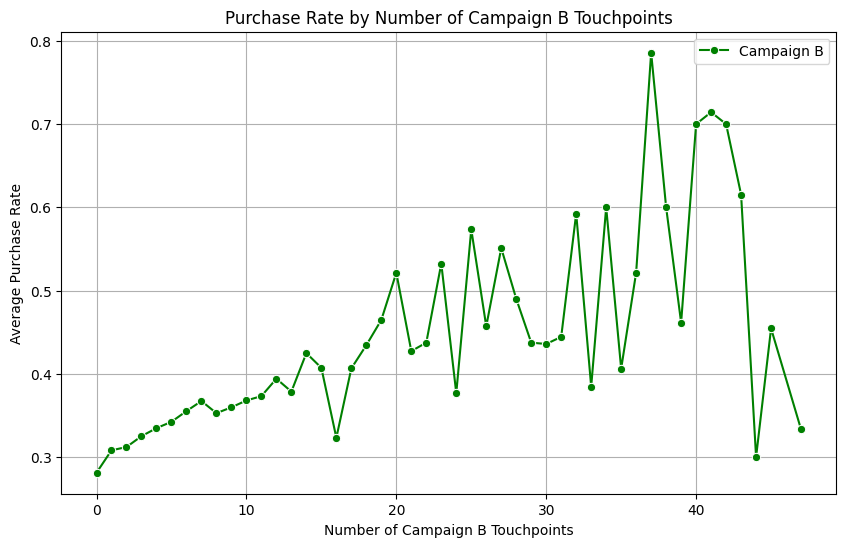

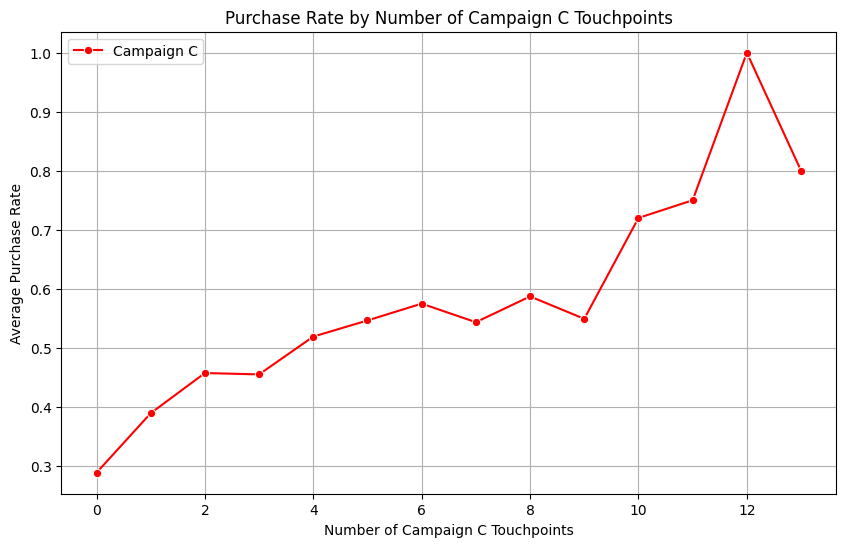

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the dataset (if not already loaded)
file_path = '/content/drive/Shareddrives/CarMax/Fall 2024 Dataset.csv'
data = pd.read_csv(file_path)

# Step 1: Data Preparation

# Fill missing 'vehicle_class' based on 'purchase_flag' but exclude it from regression analysis
data['vehicle_class'].fillna('No Purchase', inplace=True)

# Define 'finance_customer' and 'service_plan' properly
data.loc[data['purchase_flag'] == 0, ['finance_customer', 'service_plan_customer']] = 0

# Create 'total_touchpoints' if not already present
data['total_touchpoints'] = data['campaign_a_touchpoints'] + data['campaign_b_touchpoints'] + data['campaign_c_touchpoints']

# Step 2: Filter out touchpoints that appear fewer than 10 times

# Campaign A
touchpoint_counts_a = data['campaign_a_touchpoints'].value_counts()
valid_touchpoints_a = touchpoint_counts_a[touchpoint_counts_a >= 10].index
data = data[data['campaign_a_touchpoints'].isin(valid_touchpoints_a)]

# Campaign B
touchpoint_counts_b = data['campaign_b_touchpoints'].value_counts()
valid_touchpoints_b = touchpoint_counts_b[touchpoint_counts_b >= 10].index
data = data[data['campaign_b_touchpoints'].isin(valid_touchpoints_b)]

# Campaign C
touchpoint_counts_c = data['campaign_c_touchpoints'].value_counts()
valid_touchpoints_c = touchpoint_counts_c[touchpoint_counts_c >= 10].index
data = data[data['campaign_c_touchpoints'].isin(valid_touchpoints_c)]

# Step 3: Normalize Touchpoint Variables for Model Use (if needed)
features = ['campaign_a_touchpoints', 'campaign_b_touchpoints', 'campaign_c_touchpoints', 'total_touchpoints']
scaler = StandardScaler()
data[features] = scaler.fit_transform(data[features])

# Unnormalize values to original scale for interpretation
data[features] = scaler.inverse_transform(data[features])

# Step 4: Analyze Purchase Rates by Specific Touchpoint Counts

# Calculate purchase rates by touchpoint counts for Campaign A, B, and C
purchase_rate_a = data.groupby('campaign_a_touchpoints')['purchase_flag'].mean().reset_index(name='purchase_rate')
purchase_rate_b = data.groupby('campaign_b_touchpoints')['purchase_flag'].mean().reset_index(name='purchase_rate')
purchase_rate_c = data.groupby('campaign_c_touchpoints')['purchase_flag'].mean().reset_index(name='purchase_rate')

# Step 5: Visualize Purchase Rates by Touchpoint Counts

# Plot for Campaign A
plt.figure(figsize=(10, 6))
sns.lineplot(x='campaign_a_touchpoints', y='purchase_rate', data=purchase_rate_a, marker='o', label='Campaign A')
plt.title('Purchase Rate by Number of Campaign A Touchpoints')
plt.xlabel('Number of Campaign A Touchpoints')
plt.ylabel('Average Purchase Rate')
plt.grid(True)
plt.show()

# Plot for Campaign B
plt.figure(figsize=(10, 6))
sns.lineplot(x='campaign_b_touchpoints', y='purchase_rate', data=purchase_rate_b, marker='o', label='Campaign B', color='green')
plt.title('Purchase Rate by Number of Campaign B Touchpoints')
plt.xlabel('Number of Campaign B Touchpoints')
plt.ylabel('Average Purchase Rate')
plt.grid(True)
plt.show()

# Plot for Campaign C
plt.figure(figsize=(10, 6))
sns.lineplot(x='campaign_c_touchpoints', y='purchase_rate', data=purchase_rate_c, marker='o', label='Campaign C', color='red')
plt.title('Purchase Rate by Number of Campaign C Touchpoints')
plt.xlabel('Number of Campaign C Touchpoints')
plt.ylabel('Average Purchase Rate')
plt.grid(True)
plt.show()


<ipython-input-29-a3f476338bb4>:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['vehicle_class'].fillna('No Purchase', inplace=True)


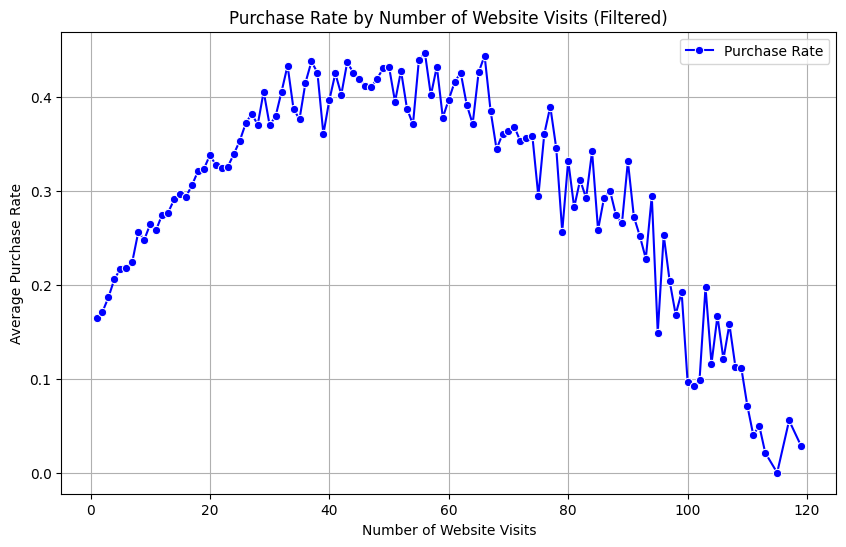

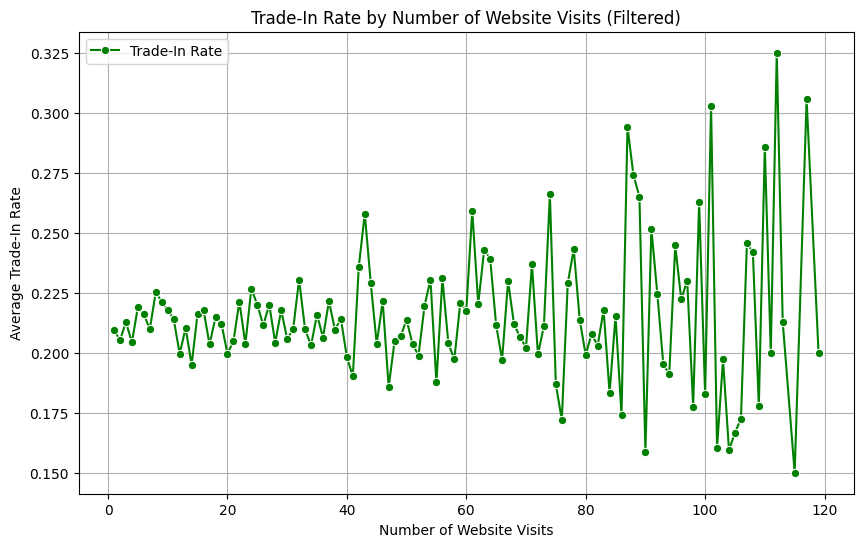

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset (if not already loaded)
file_path = '/content/drive/Shareddrives/CarMax/Fall 2024 Dataset.csv'
data = pd.read_csv(file_path)

# Step 1: Data Preparation (repeat if needed)
data['vehicle_class'].fillna('No Purchase', inplace=True)
data.loc[data['purchase_flag'] == 0, ['finance_customer', 'service_plan_customer']] = 0
data['total_touchpoints'] = data['campaign_a_touchpoints'] + data['campaign_b_touchpoints'] + data['campaign_c_touchpoints']

# Step 2: Filter out 'num_web_visits' values that appear fewer than 10 times

# Get counts of each 'num_web_visits' value
web_visit_counts = data['num_web_visits'].value_counts()
# Only keep values that appear 10 or more times
valid_web_visits = web_visit_counts[web_visit_counts >= 30].index
# Filter the data to include only those valid web visit counts
data = data[data['num_web_visits'].isin(valid_web_visits)]

# Step 3: Analyze Purchase and Trade-In Rates by Website Visits

# Calculate purchase rates by number of website visits
purchase_rate_web_visits = data.groupby('num_web_visits')['purchase_flag'].mean().reset_index(name='purchase_rate')

# Calculate trade-in rates by number of website visits
trade_in_rate_web_visits = data.groupby('num_web_visits')['trade_in_customer'].mean().reset_index(name='trade_in_rate')

# Step 4: Visualize Purchase Rates by Number of Website Visits

# Plot purchase rate by number of website visits
plt.figure(figsize=(10, 6))
sns.lineplot(x='num_web_visits', y='purchase_rate', data=purchase_rate_web_visits, marker='o', label='Purchase Rate', color='blue')
plt.title('Purchase Rate by Number of Website Visits (Filtered)')
plt.xlabel('Number of Website Visits')
plt.ylabel('Average Purchase Rate')
plt.grid(True)
plt.show()

# Step 5: Visualize Trade-In Rates by Number of Website Visits

# Plot trade-in rate by number of website visits
plt.figure(figsize=(10, 6))
sns.lineplot(x='num_web_visits', y='trade_in_rate', data=trade_in_rate_web_visits, marker='o', label='Trade-In Rate', color='green')
plt.title('Trade-In Rate by Number of Website Visits (Filtered)')
plt.xlabel('Number of Website Visits')
plt.ylabel('Average Trade-In Rate')
plt.grid(True)
plt.show()


*   The highest purchase rate occurs between 30-65 website visits, hovering around 40% before dropping off the more they visit (cutoff = min(count)> 10-30: nothing changes)
*   Trade-in rate largely stays between 20-25% for all website visit values between 0-80, reaching more drastic peaks and valleys the higher the value goes. (cutoff = min(count)> 10-30: nothing changes)



In [ ]:
import pandas as pd

# Load the dataset (if not already loaded)
file_path = '/content/drive/Shareddrives/CarMax/Fall 2024 Dataset.csv'
data = pd.read_csv(file_path)

# Step 1: Replace missing 'vehicle_class' values where 'purchase_flag' is True with 'unlisted_vehicle_class'
data.loc[(data['purchase_flag'] == True) & (data['vehicle_class'].isna()), 'vehicle_class'] = 'unlisted_vehicle_class'

# Step 2: Compile the counts of different 'vehicle_class' by 'state'
vehicle_class_by_state = data.groupby(['state', 'vehicle_class']).size().unstack(fill_value=0)

# Step 3: Add a 'total_vehicles_sold' column that sums across all vehicle classes for each state
vehicle_class_by_state['total_vehicles_sold'] = vehicle_class_by_state.sum(axis=1)

# Display the compiled table
print(vehicle_class_by_state)

# Alternatively, save the table to a CSV if needed
vehicle_class_by_state.to_csv('vehicle_class_by_state.csv', index=True)


vehicle_class  COMPACT  FULL SIZE  LARGE SUV  LUXURY  MEDIUM SUV  MID SIZE  \
state                                                                        
AL                  59         25         15      65         138        72   
AZ                  95         13         25      71         148        63   
CA                  91         12         15     115         146        82   
CO                  48          6         22      49         202        40   
CT                  83          7         12     126         142        66   
DE                  98         11         13      65         145        64   
FL                 106         14         23      85         144        57   
GA                 105         22         12      72         139        88   
IA                  68         18          5      46         133        66   
ID                  58          5         23      52         180        26   
IL                  89         20          6      42         146

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Scale the data
features = ['campaign_a_touchpoints', 'campaign_b_touchpoints', 'campaign_c_touchpoints', 'total_touchpoints',
            'num_web_visits', 'purchase_flag']

# Standardize the data (since K-Means is distance-based, scaling helps)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data[features])

# Step 3: Apply K-Means clustering
# Assume we want to create 3 customer segments (clusters)
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(scaled_data)

# Add the cluster labels to the original DataFrame
data['Cluster'] = kmeans.labels_

# Step 4: Visualize the clusters
plt.figure(figsize=(10, 6))
plt.scatter(df['num_web_visits'], df['total_touchpoints'], c=df['Cluster'], cmap='viridis', s=100)
plt.title('Customer Segments based on Number of Web Visits and Total Touchpoints')
plt.xlabel('Number of Web Visits')
plt.ylabel('Total Touchpoints')
plt.grid(True)
plt.show()

# Step 5: Analyze cluster centers
centers = scaler.inverse_transform(kmeans.cluster_centers_)  # Get the cluster centers in original scale
centroid_data = pd.DataFrame(centers, columns=features)
print("Cluster Centers (Centroids):")
print(centroid_data)

# Step 6: Display the final DataFrame with customer segments
print("Customer Segments:")
print(data)

NameError: name 'df' is not defined

<Figure size 1000x600 with 0 Axes>

K-Clustering ran through ChatGPT to debug

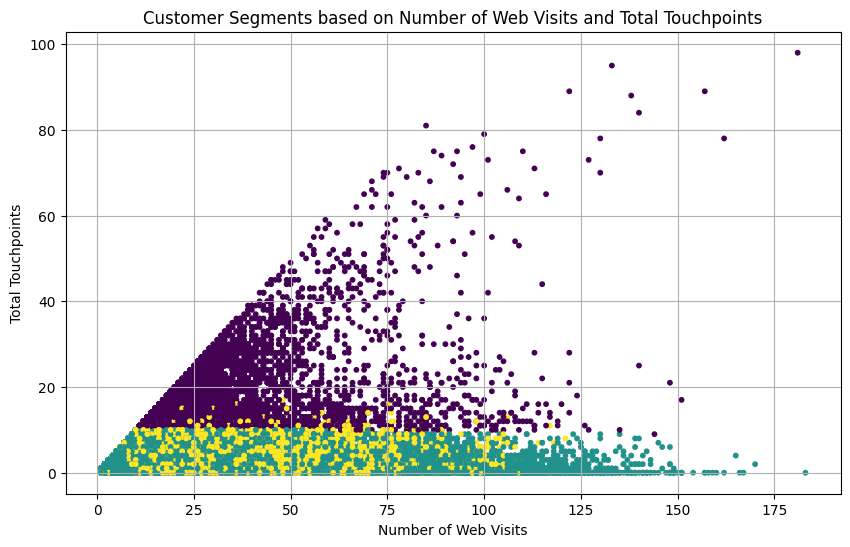

Cluster Centers (Centroids):
   campaign_a_touchpoints  campaign_b_touchpoints  campaign_c_touchpoints  \
0                2.222248               16.679463                0.239362   
1                0.087861                0.905863                0.119121   
2                0.107307                1.104442                0.314069   

   total_touchpoints  num_web_visits  purchase_flag  
0          19.141073       35.675532   4.137373e-01  
1           1.112845       24.159654   3.064216e-14  
2           1.525819       28.468699   9.978779e-01  
Customer Segments:
   Unnamed: 0  campaign_a_touchpoints  campaign_b_touchpoints  \
0           0                      10                       0   
1           1                       0                       1   
2           2                       0                       5   
3           3                       0                       5   
4           4                       0                       0   

   campaign_c_touchpoints  total_tou

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Load the dataset (if not already loaded)
file_path = '/content/drive/Shareddrives/CarMax/Fall 2024 Dataset.csv'
data = pd.read_csv(file_path)

# Scale the data
features = ['campaign_a_touchpoints', 'campaign_b_touchpoints', 'campaign_c_touchpoints', 'total_touchpoints',
            'num_web_visits', 'purchase_flag']

# Standardize the data (since K-Means is distance-based, scaling helps)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data[features])

# Step 3: Apply K-Means clustering
# Assume we want to create 3 customer segments (clusters)
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(scaled_data)

# Add the cluster labels to the original DataFrame
data['Cluster'] = kmeans.labels_

# Step 4: Visualize the clusters
plt.figure(figsize=(10, 6))
plt.scatter(data['num_web_visits'], data['total_touchpoints'], c=data['Cluster'], cmap='viridis', s=10)
plt.title('Customer Segments based on Number of Web Visits and Total Touchpoints')
plt.xlabel('Number of Web Visits')
plt.ylabel('Total Touchpoints')
plt.grid(True)
plt.show()

# Step 5: Analyze cluster centers
centers = scaler.inverse_transform(kmeans.cluster_centers_)  # Get the cluster centers in original scale
centroid_data = pd.DataFrame(centers, columns=features)
print("Cluster Centers (Centroids):")
print(centroid_data)

# Step 6: Display the final DataFrame with customer segments
print("Customer Segments:")
print(data.head())


***Cluster by Purchase***

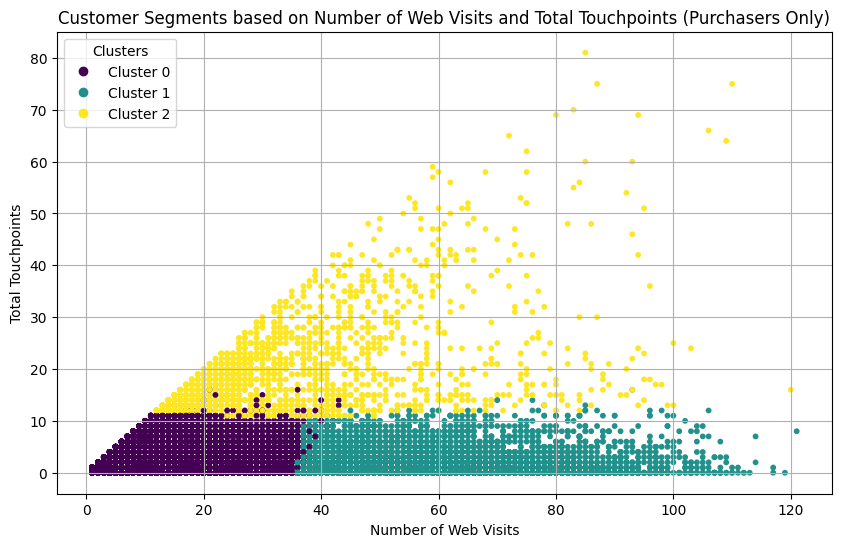

Cluster Centers (Centroids):
   campaign_a_touchpoints  campaign_b_touchpoints  campaign_c_touchpoints  \
0                0.116258                1.186094                0.315571   
1                0.096679                1.064037                0.239601   
2                2.294047               17.814793                0.440770   

   total_touchpoints  num_web_visits  
0           1.617923       15.922170  
1           1.400317       56.158903  
2          20.549609       36.752856  
Customer Segments:
    Unnamed: 0  campaign_a_touchpoints  campaign_b_touchpoints  \
4            4                       0                       0   
6            6                       0                       0   
8            8                       0                       0   
12          12                       0                       0   
23          23                       0                       0   

    campaign_c_touchpoints  total_touchpoints  num_web_visits  purchase_flag  \
4         

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Load the dataset (if not already loaded)
file_path = '/content/drive/Shareddrives/CarMax/Fall 2024 Dataset.csv'
data = pd.read_csv(file_path)

# Step 1: Filter the data to include only customers who purchased a car
data = data[data['purchase_flag'] == 1]

# Step 2: Scale the data
# Define the features to be used in clustering
features = ['campaign_a_touchpoints', 'campaign_b_touchpoints', 'campaign_c_touchpoints',
            'total_touchpoints', 'num_web_visits']

# Standardize the data (since K-Means is distance-based, scaling helps)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data[features])

# Step 3: Apply K-Means clustering
# Assume we want to create 3 customer segments (clusters)
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(scaled_data)

# Add the cluster labels to the filtered DataFrame
data['Cluster'] = kmeans.labels_

# Step 4: Visualize the clusters
plt.figure(figsize=(10, 6))
scatter = plt.scatter(data['num_web_visits'], data['total_touchpoints'],
                      c=data['Cluster'], cmap='viridis', s=10)
plt.title('Customer Segments based on Number of Web Visits and Total Touchpoints (Purchasers Only)')
plt.xlabel('Number of Web Visits')
plt.ylabel('Total Touchpoints')
plt.grid(True)

# Add a legend with cluster labels
legend_labels = ['Cluster 0', 'Cluster 1', 'Cluster 2']
plt.legend(handles=scatter.legend_elements()[0], labels=legend_labels, title="Clusters")
plt.show()

# Step 5: Analyze cluster centers
centers = scaler.inverse_transform(kmeans.cluster_centers_)  # Get the cluster centers in original scale
centroid_data = pd.DataFrame(centers, columns=features)
print("Cluster Centers (Centroids):")
print(centroid_data)

# Step 6: Display the final DataFrame with customer segments
print("Customer Segments:")
print(data.head())
# Display the unique cluster labels assigned
print("Unique Cluster Labels:", data['Cluster'].unique())

# Display a few rows of the DataFrame to see cluster assignments
print(data[['num_web_visits', 'total_touchpoints', 'Cluster']].head())

# Display the unique cluster labels assigned
print("Unique Cluster Labels:", data['Cluster'].unique())

# Display a few rows of the DataFrame to see cluster assignments
print(data[['num_web_visits', 'total_touchpoints', 'Cluster']].head())




***INVENTORY: Percentage of Total Number of Vehicles Sold by Class***

  vehicle_class  count  percentage
0       COMPACT   3240   10.798920
1     FULL SIZE    506    1.686498
2     LARGE SUV    599    1.996467
3        LUXURY   2709    9.029097
4    MEDIUM SUV   6023   20.074659
5        PICKUP   3221   10.735593
6     SMALL SUV   9903   33.006699
7    SPORTS CAR    712    2.373096
8           VAN    889    2.963037


<ipython-input-8-d0d0541352be>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=vehicle_class_summary, x='vehicle_class', y='percentage', palette='viridis')


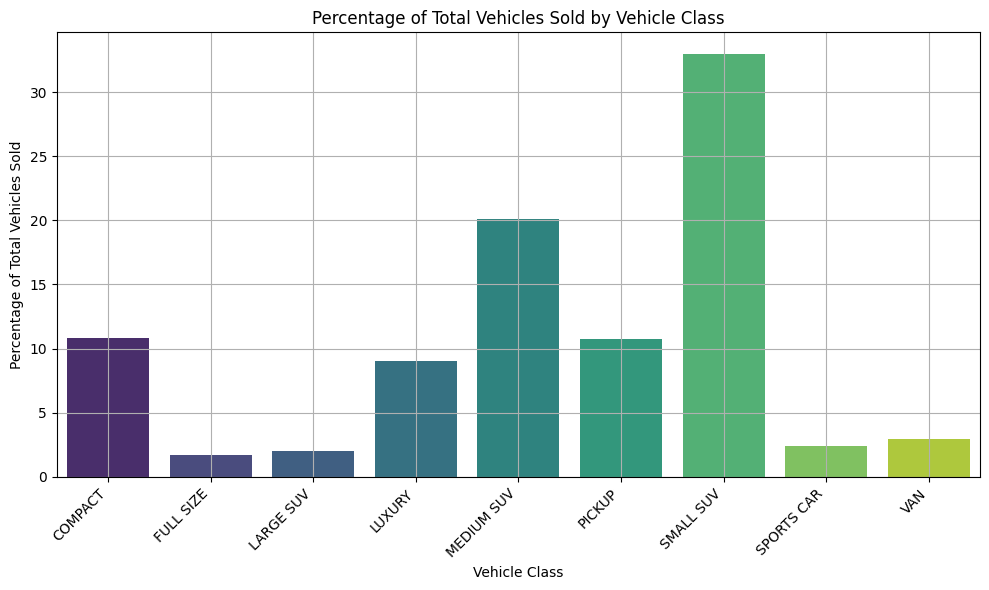

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
ClassByStateDF = pd.read_csv("/content/drive/Shareddrives/CarMax/vehicle_class_by_state.csv")

# Step 1: Calculate the total number of vehicles sold across all categories
total_vehicles_sold = ClassByStateDF['total_vehicles_sold'].sum()

# Step 2: Sum the sales for each vehicle class category (compact, fullsize, etc.)
vehicle_class_summary = ClassByStateDF[['COMPACT', 'FULL SIZE', 'LARGE SUV', 'LUXURY',
                                         'MEDIUM SUV', 'PICKUP', 'SMALL SUV',
                                         'SPORTS CAR', 'VAN']].sum().reset_index()

# Rename columns for clarity
vehicle_class_summary.columns = ['vehicle_class', 'count']

# Step 3: Calculate percentages
vehicle_class_summary['percentage'] = (vehicle_class_summary['count'] / total_vehicles_sold) * 100

# Print the summary to review the results
print(vehicle_class_summary)

# Step 4: Visualize the results using a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=vehicle_class_summary, x='vehicle_class', y='percentage', palette='viridis')
plt.title('Percentage of Total Vehicles Sold by Vehicle Class')
plt.xlabel('Vehicle Class')
plt.ylabel('Percentage of Total Vehicles Sold')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.tight_layout()
plt.show()